In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import requests
import datetime
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
start_date = datetime.datetime(2011, 12, 30)
end_date = datetime.datetime(2018, 1, 30)
twitter_handle = 'tomhanks'
dates = []
def get_url(twitter_handle, date_str):
    return 'http://web.archive.org/web/%s000000/http://twitter.com/%s' % (date_str, twitter_handle)

for date in list(pd.date_range(start_date, end_date, freq='6M')):
    dates.append(date.strftime('%Y%m%d'))
    
    
twitter_parse = {}
twitter_parse[twitter_handle] = {}



for date in dates:
    print(date)
#     try:
    twitter_parse[twitter_handle][date] = {}
    r = requests.get(get_url(twitter_handle, date))
    soup = BeautifulSoup(r.text, "html5lib")
    field_names = ['num_tweets', 'num_following', 'num_followers', 'num_likes']
    elements = soup.findAll('span', attrs={'class': 'ProfileNav-value'})[:4]
    attribute = 'data-count'
    field_names = ['num_tweets', 'num_following', 'num_followers', 'num_likes']
    if len(elements) == 0:
        continue
    if not elements[0].get_attribute_list(attribute)[0]:
        elements = soup.findAll('a', attrs={'class': 'ProfileNav-stat--link'})[:4]
        attribute = 'title'
        field_names = ['num_following', 'num_likes', 'num_followers', 'num_tweets']
    for elem, field in zip(elements, field_names):
        twitter_parse[twitter_handle][date][field] = elem.get_attribute_list(attribute)
#     except:
#     print('ERROR')

20111231
20120630
20121231
20130630
20131231
20140630
20141231
20150630
20151231
20160630
20161231
20170630
20171231


In [94]:
dates

['20111231',
 '20120630',
 '20121231',
 '20130630',
 '20131231',
 '20140630',
 '20141231',
 '20150630',
 '20151231',
 '20160630',
 '20161231',
 '20170630',
 '20171231']

In [19]:
r = requests.get(get_url(twitter_handle, datetime.datetime(2016,12,1)))
print(r.url)
soup = BeautifulSoup(r.text, "html5lib")
# soup.find_all(re.compile('(a|li)'), {'class': re.compile(r'following')})
soup.find_all('ul')

http://web.archive.org/web/20080922131416/http://twitter.com:80/russellcrowe


[<ul id="accessibility">
   <li>On a mobile phone? Check out <a href="http://web.archive.org/web/20080922131416/http://m.twitter.com/">m.twitter.com</a>!</li>
   <li><a accesskey="2" href="#footer">Skip to navigation</a></li>
     <li><a href="#signin">Skip to sign in form</a></li>
 </ul>, <ul class="about vcard entry-author">
       <li><span class="label">Name</span> <span class="fn">russellcrowe</span></li>
               <li><span class="label">Location</span> <span class="adr">Home of the Crimson Tide</span></li>
                     <li><span class="label">Web</span> <a class="url" href="http://web.archive.org/web/20080922131416/http://www.thehitechredneck.com/" rel="me nofollow">http://www.thehit...</a></li>
       
             <li id="bio"><span class="label">Bio</span> <span class="bio">"The dude abides"</span></li>
           </ul>, <ul id="tabMenu">
   <li>
     <a href="#" id="updates_tab" onclick="gaTrack('/home/refresh'); new Ajax.Request('/russellcrowe', {asynchronous:t

In [75]:
get_url(twitter_handle, date)

'http://web.archive.org/web/20171231000000/http://twitter.com/SamuelLJackson'

In [76]:
elements

[<span class="ProfileNav-value" data-count="3136" data-is-compact="false">3,136
             </span>,
 <span class="ProfileNav-value" data-count="858" data-is-compact="false">858</span>,
 <span class="ProfileNav-value" data-count="7163898" data-is-compact="true">7.16ಮಿ</span>,
 <span class="ProfileNav-value" data-count="200" data-is-compact="false">200</span>]

In [95]:
twitter_parse

{'tomhanks': {'20111231': {},
  '20120630': {},
  '20121231': {},
  '20130630': {},
  '20131231': {},
  '20140630': {'num_followers': ['24 Following'],
   'num_following': ['547 Tweets'],
   'num_likes': ['133 Photos/Videos'],
   'num_tweets': ['8,412,231 Followers']},
  '20141231': {'num_followers': ['৯১,৫১,০৯১ অনুসারীগণ'],
   'num_following': ['৬১১ টুইটগুলি'],
   'num_likes': ['২৫ নিম্নলিখিত'],
   'num_tweets': [None]},
  '20150630': {'num_followers': ['9,932,348 Followers'],
   'num_following': ['654 Tweets'],
   'num_likes': ['25 Following'],
   'num_tweets': [None]},
  '20151231': {'num_followers': ['10,944,107 ಹಿಂಬಾಲಕರು'],
   'num_following': ['682 ಟ್ವೀಟ್\u200cಗಳು'],
   'num_likes': ['25 ಹಿಂಬಾಲಿಸುತ್ತಿದ್ದಾರೆ'],
   'num_tweets': [None]},
  '20160630': {'num_followers': ['11,975,201 Followers'],
   'num_following': ['712 Tweets'],
   'num_likes': ['25 Following'],
   'num_tweets': [None]},
  '20161231': {'num_followers': ['12,515,551 ಹಿಂಬಾಲಕರು'],
   'num_following': ['747 ಟ್ವೀಟ್\u20

In [96]:
for key in twitter_parse:
    for date in twitter_parse[key]:
        for number in twitter_parse[key][date]:
            if twitter_parse[key][date][number][0]:
                twitter_parse[key][date][number] = int(re.sub(r'\D', '', twitter_parse[key][date][number][0]))

In [97]:
twitter_parse

{'tomhanks': {'20111231': {},
  '20120630': {},
  '20121231': {},
  '20130630': {},
  '20131231': {},
  '20140630': {'num_followers': 24,
   'num_following': 547,
   'num_likes': 133,
   'num_tweets': 8412231},
  '20141231': {'num_followers': 9151091,
   'num_following': 611,
   'num_likes': 25,
   'num_tweets': [None]},
  '20150630': {'num_followers': 9932348,
   'num_following': 654,
   'num_likes': 25,
   'num_tweets': [None]},
  '20151231': {'num_followers': 10944107,
   'num_following': 682,
   'num_likes': 25,
   'num_tweets': [None]},
  '20160630': {'num_followers': 11975201,
   'num_following': 712,
   'num_likes': 25,
   'num_tweets': [None]},
  '20161231': {'num_followers': 12515551,
   'num_following': 747,
   'num_likes': 24,
   'num_tweets': [None]},
  '20170630': {'num_followers': 13345672,
   'num_following': 24,
   'num_likes': [None],
   'num_tweets': 799},
  '20171231': {'num_followers': 14951877,
   'num_following': 24,
   'num_likes': [None],
   'num_tweets': 820}}}

In [98]:
data_columns = 'name', 'date', 'num_followers', 'num_following', 'num_likes', 'num_tweets'
data_list = []

for key in twitter_parse:
    for date in twitter_parse[key]:
        try:
            data_list.append([key, date, twitter_parse[key][date]['num_followers'],
                             twitter_parse[key][date]['num_following'],
                             twitter_parse[key][date]['num_likes'],
                             twitter_parse[key][date]['num_tweets']])
        except:
            pass
df = pd.DataFrame(data_list, columns=data_columns)

In [99]:
df['date'] = pd.to_datetime(df['date'])

In [100]:
df

,name,date,num_followers,num_following,num_likes,num_tweets
0,tomhanks,2014-06-30,24,547,133,8412231
1,tomhanks,2014-12-31,9151091,611,25,[None]
2,tomhanks,2015-06-30,9932348,654,25,[None]
3,tomhanks,2015-12-31,10944107,682,25,[None]
4,tomhanks,2016-06-30,11975201,712,25,[None]
5,tomhanks,2016-12-31,12515551,747,24,[None]
6,tomhanks,2017-06-30,13345672,24,[None],799
7,tomhanks,2017-12-31,14951877,24,[None],820


In [101]:
df['num_followers'][0] = df['num_tweets'][0]
df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,date,num_followers,num_following,num_likes,num_tweets
0,tomhanks,2014-06-30,8412231,547,133,8412231
1,tomhanks,2014-12-31,9151091,611,25,[None]
2,tomhanks,2015-06-30,9932348,654,25,[None]
3,tomhanks,2015-12-31,10944107,682,25,[None]
4,tomhanks,2016-06-30,11975201,712,25,[None]
5,tomhanks,2016-12-31,12515551,747,24,[None]
6,tomhanks,2017-06-30,13345672,24,[None],799
7,tomhanks,2017-12-31,14951877,24,[None],820


In [102]:
start_date_proj = datetime.datetime(2009, 6, 1)
end_date_proj = datetime.datetime.now().date()

start_followers = 0
end_followers = 15100000

(5000000, 16000000)

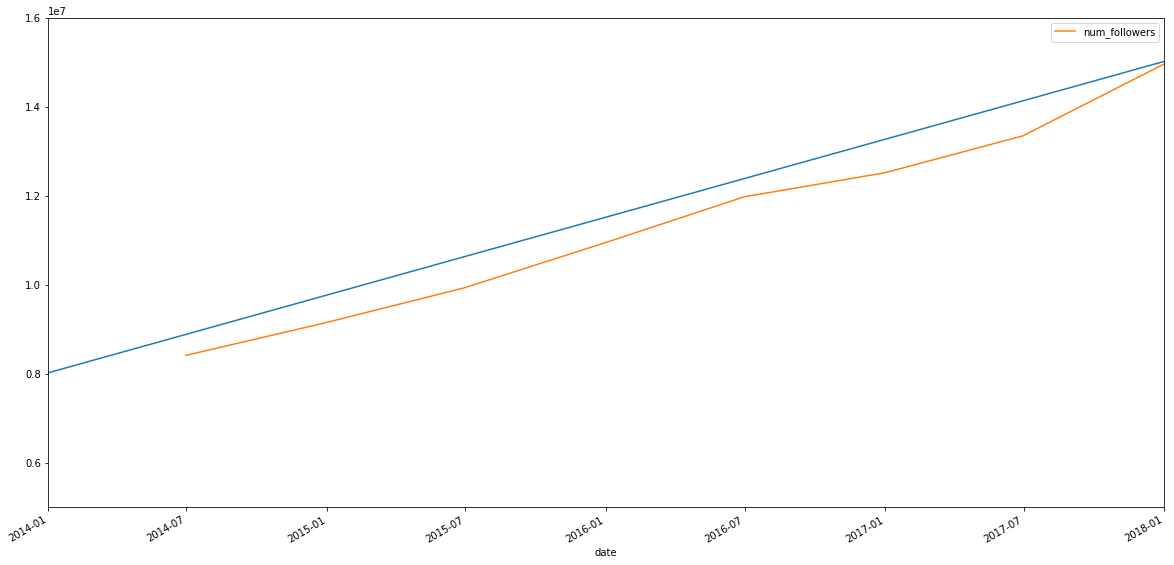

In [106]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot([start_date_proj, end_date_proj], [start_followers, end_followers])
df.plot('date', 'num_followers', ax=ax)
plt.xlim(datetime.datetime(2014,1,1), datetime.datetime(2018,1,1))
plt.ylim(5000000,16000000)
# plt.ylim('auto')